In [1]:
import os
import h5py, glob
import numpy as np 
from tqdm.notebook import tqdm
from astropy import table as aTable

In [2]:
# -- plotting -- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
snapshot = 91

In [4]:
grp_dir = '/scratch/gpfs/chhahn/haloflow/groupcat/idark.ipmu.jp/hsc405/GroupCats/groups_0%i/' % snapshot
#grp_dir = '/scratch/gpfs/chhahn/haloflow/groupcat/idark.ipmu.jp/hsc405/GroupCats/tng100/'

h = 0.6773358287273804

# compile subhalos and groups
groupfirstsub = [] 

tab_sub, tab_grp = [], []
for i in tqdm(range(np.max([int(fsub.split('.')[-2]) for fsub in glob.glob(os.path.join(grp_dir, '*.hdf5'))])+1)):
    with h5py.File(os.path.join(grp_dir, 'fof_subhalo_tab_0%i.%i.hdf5' % (snapshot, i)), 'r') as fsub:
        _tab = aTable.Table()
        for k in fsub['Subhalo'].keys():
            _tab[k] = fsub['Subhalo'][k][...]
        tab_sub.append(_tab)
        
        
        if (len(fsub['Group'].keys())) == 0: continue
        groupfirstsub.append(fsub['Group']['GroupFirstSub'][...])

tab_sub = aTable.vstack(tab_sub)
groupfirstsub = np.concatenate(np.array(groupfirstsub))

  0%|          | 0/680 [00:00<?, ?it/s]

/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [5]:
central_subid = groupfirstsub[groupfirstsub != -1]

In [6]:
tab_sub = tab_sub[central_subid]

In [7]:
logms = np.log10(tab_sub['SubhaloMassType'][:,4] * 10**10 / h)
logmh = np.log10(tab_sub['SubhaloMassType'][:,1] * 10**10 / h)

mlim = logms > 9.0
logms = logms[mlim]
logmh = logmh[mlim]

/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [8]:
grp_dir = '/scratch/gpfs/chhahn/haloflow/groupcat/idark.ipmu.jp/hsc405/GroupCats/tng100/'

h = 0.6773358287273804

# compile subhalos and groups
groupfirstsub = [] 

tab_sub, tab_grp = [], []
for i in tqdm(range(np.max([int(fsub.split('.')[-2]) for fsub in glob.glob(os.path.join(grp_dir, '*.hdf5'))])+1)):
    with h5py.File(os.path.join(grp_dir, 'fof_subhalo_tab_0%i.%i.hdf5' % (snapshot, i)), 'r') as fsub:
        _tab = aTable.Table()
        for k in fsub['Subhalo'].keys():
            _tab[k] = fsub['Subhalo'][k][...]
        tab_sub.append(_tab)
        
        
        if (len(fsub['Group'].keys())) == 0: continue
        groupfirstsub.append(fsub['Group']['GroupFirstSub'][...])

tab_sub = aTable.vstack(tab_sub)
groupfirstsub = np.concatenate(np.array(groupfirstsub))

central_subid = groupfirstsub[groupfirstsub != -1]

tab_sub = tab_sub[central_subid]

logms1 = np.log10(tab_sub['SubhaloMassType'][:,4] * 10**10 / h)
logmh1 = np.log10(tab_sub['SubhaloMassType'][:,1] * 10**10 / h)

mlim1 = logms1 > 9.0
logms1 = logms1[mlim1]
logmh1 = logmh1[mlim1]

  0%|          | 0/448 [00:00<?, ?it/s]

/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


/home/chhahn/.conda/envs/sbi/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


(9.0, 12.5)

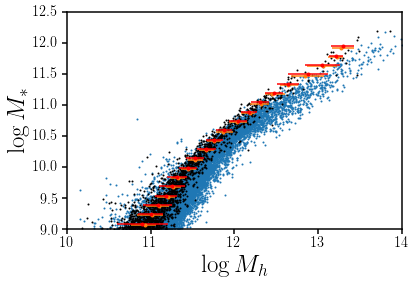

In [17]:
plt.scatter(logmh1, logms1, s=1, c='C0')
plt.scatter(logmh, logms, s=1, c='k')

ms_bins = np.linspace(9., 12., 21)

mh_mean, mh_std, mh_med, mh_lo, mh_hi = [], [], [], [], []
for i in range(len(ms_bins)-1): 
    in_ms = (logms > ms_bins[i]) & (logms <= ms_bins[i+1])
    mh_mean.append(np.mean(logmh[in_ms]))
    mh_std.append(np.std(logmh[in_ms]))
    
    mh_med.append(np.median(logmh[in_ms]))
    mh_lo.append(np.quantile(logmh[in_ms], 0.16))
    mh_hi.append(np.quantile(logmh[in_ms], 0.84))
plt.errorbar(mh_med, 0.5*(ms_bins[:-1] + ms_bins[1:]), 
             xerr=np.array([np.array(mh_med)-np.array(mh_lo), np.array(mh_hi)-np.array(mh_med)]), fmt='.C1')
plt.errorbar(mh_mean, 0.5*(ms_bins[:-1] + ms_bins[1:])+0.02, 
             xerr=np.array(mh_std), fmt='.r')
plt.xlabel(r'$\log M_h$', fontsize=25)
plt.xlim(10, 14)
plt.ylabel(r'$\log M_*$', fontsize=25)
plt.ylim(9, 12.5)

In [61]:
np.savetxt('/scratch/gpfs/chhahn/haloflow/tng.ms_mh.txt', 
           np.array([0.5*(ms_bins[:-1] + ms_bins[1:]), np.array(mh_med), np.array(mh_lo), np.array(mh_hi)]).T, 
           header='logM*, logMh median, logMh 16th, logMh 84th')